In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision

In [3]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(28, 128) #input dim = 28, hidden = 128
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        

    def forward(self, x):
        a = F.relu(self.fc1(x))
        a = F.relu(self.fc2(a))
        a = F.relu(self.fc3(a))
        a = self.fc4(a)
        
        return a

In [4]:
import set_data as sd

# load train set, test set

X_train, Y_train, X_test, Y_test = sd.set_data("data/combined_total_data_1")
print(X_train[0], Y_train[0])

x_train = Variable(X_train)
y_train = Variable(Y_train)


tensor([-0.2904, -0.6558,  0.2619,  1.5265, -0.8838,  1.3313,  0.9538,  0.2107,
         0.8753, -0.3144, -1.4738, -1.0943, -0.8747, -0.0122, -1.2993,  1.5285,
        -1.4652, -0.9095, -0.9493,  0.2172,  0.8782, -0.4555,  0.9523,  0.2168,
         0.8789, -1.5887, -1.6440, -0.6523], dtype=torch.float64) tensor([-1.8803], dtype=torch.float64)


In [5]:
# train
# hyperparameter

#def RMSELoss(yhat,y):
    #return torch.sqrt(torch.mean((yhat-y)**2))

#criterion = RMSELoss


In [5]:
epochs = 300
learningrate = 1e-3
# batch_size
# hidden_layer_size = 128

model = RegressionModel()
criterion = nn.MSELoss(size_average = True, reduction='mean') 
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

print('\nStart Training...\n')

loss_graph = []
for epoch in range(epochs+1):
    # forward pass
    pred_y = model(x_train.float()) # 임의로 type convert 
    

    # compute and print loss
    loss = criterion(pred_y.double(), y_train) # 임의로 type convert

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_graph.append(loss.item())
    
    if epoch % 100 == 0:
        print ('epoch [{}/{}], loss {}'.format(epoch, epochs, loss.item())) # or loss item
    

/nfs/home/kit7777777t/anaconda3/envs/LENNA/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))



Start Training...

epoch [0/300], loss 0.10042345824237987
epoch [100/300], loss 0.03832522822491647
epoch [200/300], loss 0.032331293527740015
epoch [300/300], loss 0.030373450285052433


In [6]:
torch.save(model.state_dict(), "lenna0.pth")

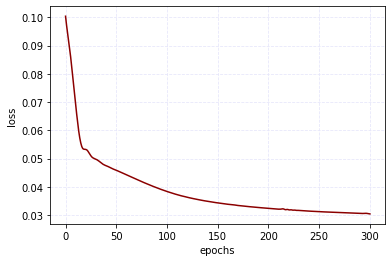

In [9]:
fig = plt.figure()
plt.plot(range(epochs+1), loss_graph, label = 'loss', color = 'black')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(linestyle = '--', color = 'lavender')
plt.show()

In [10]:
model=torch.load('lenna0.pth')
x_test = Variable(X_test)
y_test = Variable(Y_test)


model.eval()





Start Testing...



RegressionModel(
  (fc1): Linear(in_features=28, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)

In [9]:
# visualize : TODO